# Basics in Summary Statistics
In this module, we will complete the following questions as a review/practice of summary statistics:

1. Greg was 14, Marcia was 12, Peter was 11, Jan was 10, Bobby was 8, and Cindy was 6 when they started playing the Brady kids on The Brady Bunch.  Cousin Oliver was 8 years old when he joined the show. What are the mean, median, and mode of the kids' ages when they first appeared on the show? What are the variance, standard deviation, and standard error?

2. Using these estimates, if you had to choose only one estimate of central tendency and one estimate of variance to describe the data, which would you pick and why?

3. Next, Cindy has a birthday. Update your estimates- what changed, and what didn't?

4. Nobody likes Cousin Oliver. Maybe the network should have used an even younger actor. Replace Cousin Oliver with 1-year-old Jessica, then recalculate again.  Does this change your choice of central tendency or variance estimation methods?

5. On the 50th anniversary of The Brady Bunch, four different magazines asked their readers whether they were fans of the show.  The answers were:
 
        TV Guide            20% fans
        Entertainment Weekly    23% fans
        Pop Culture Today       17% fans
        SciPhi Phanatic     5% fans

Based on these numbers, what percentage of adult Americans would you estimate were Brady Bunch fans on the 50th anniversary of the show?

In [1]:
# Importing Relevant packages used in this notebook
import numpy as np
import pandas as pd
import statistics

%matplotlib inline
import matplotlib.pyplot as plt

Let's begin by making a pandas dataframe with the above information:

In [2]:
data = pd.DataFrame()
data['Name'] = ['Greg', 'Marcia', 'Peter', 'Jan', 'Bobby', 'Cindy', 'Oliver']
data['Age']  = [14, 12, 11, 10, 8, 6, 8]
data

,Name,Age
0,Greg,14
1,Marcia,12
2,Peter,11
3,Jan,10
4,Bobby,8
5,Cindy,6
6,Oliver,8


### Question 1: Simple Calculations with Summary Statistics
<i>Greg was 14, Marcia was 12, Peter was 11, Jan was 10, Bobby was 8, and Cindy was 6 when they started playing the Brady kids on The Brady Bunch.  Cousin Oliver was 8 years old when he joined the show. What are the mean, median, and mode of the kids' ages when they first appeared on the show? What are the variance, standard deviation, and standard error

The only caveat here is that the standard deviation calculated by .describe is the sample standard deviation, when we probably want the population standard deviation instead. We can also find this using the following:

We can summarize our calcaultions in a data frame:

In [3]:
def datastats(df):
    ages = df['Age']
    age_mean = np.mean(df['Age'])
    age_median = np.median(df['Age'])
    try:
        age_mode = statistics.mode(df['Age'])
    except:
        d = {i : list(df['Age']).count(i) for i in set(df['Age'])}
        age_mode = 'Error: There is no mode' \
            if len(set(d.values())) == 1 \
            else sorted([i for i in set(data) if d[i] == max(d.values())])         
    age_var = np.var(df['Age'])
    age_std = np.std(df['Age'])
    age_se = np.std(df['Age']) / np.sqrt(len(df['Age']))
        
    age_stats = pd.DataFrame(columns=['Mean','Median','Mode','Var','Std','SE'],
                         data=[[age_mean,age_median,age_mode,age_var,age_std,age_se]])
    return age_stats.style.hide_index()
    
datastats(data)

Mean,Median,Mode,Var,Std,SE
9.85714,10,8,6.40816,2.53144,0.956793


### Question 2: Choosing a measure of Central Tendency

<i>Using these estimates, if you had to choose only one estimate of central tendency and one estimate of variance to describe the data, which would you pick and why?

The Mean. Since there does not exists extreme outliers in our data, the mean would not be prone to shifting too far from the center. To visualize our choice, we could plot a histogram (despite being an extremely small dataset):

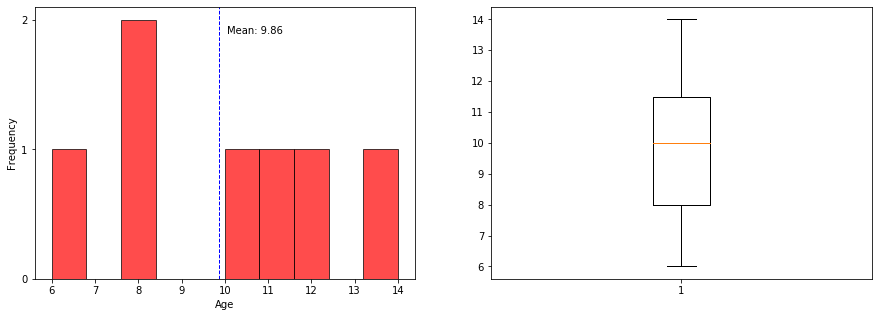

In [4]:
def pltgraphs(df):
    plt.figure(figsize=(15, 5))

    #Histogram Subplot + Meanline and mean text
    plt.subplot(1, 2, 1)
    plt.hist(df['Age'], color = 'r', edgecolor = 'k', alpha=0.7)
    plt.axvline(np.mean(df['Age']), color='blue', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(np.mean(df['Age'])*1.02, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(df['Age'])))

    #Histogram Settings
    plt.yticks(np.arange(0, 3, 1))
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    #Boxplot Subplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df['Age'])
    plt.show()

pltgraphs(data)

From our histogram, we can see that the mean lies within the center of the distribution of our data (even though it is relatively sparse). Our boxplot makes this even more clear. The median line is not quite centered within the IQR, and so the mean (which is less than the median) would be a better measure for central tendency (also, the boxplot proves there are no extreme outliers to be concerned about).

As to the measure of variance, we can just use the standard deviation.

### Question 3: Cindy has a birthday

<i>Next, Cindy has a birthday. Update your estimates- what changed, and what didn't?

Let's go ahead and update our dataframe with this change in Cindy's age:

In [5]:
data2 = pd.DataFrame()
data2['Name'] = ['Greg', 'Marcia', 'Peter', 'Jan', 'Bobby', 'Cindy', 'Oliver']
data2['Age']  = [14, 12, 11, 10, 8, 7, 8]

In [6]:
datastats(data2)

Mean,Median,Mode,Var,Std,SE
10,10,8,5.42857,2.32993,0.880631


In [7]:
datastats(data) #original for comparison

Mean,Median,Mode,Var,Std,SE
9.85714,10,8,6.40816,2.53144,0.956793


We can see that Cindy's birthday has made the mean and the median equivalent and lowered our variance and standard error.

### Question 4: Nobody likes Cousin Oliver
<i>Nobody likes Cousin Oliver. Maybe the network should have used an even younger actor. Replace Cousin Oliver with 1-year-old Jessica, then recalculate again.  Does this change your choice of central tendency or variance estimation methods?</i>

Poor Cousin Oliver. Let's go ahead and replace him with 1-year-old Jessica:

In [8]:
data3 = pd.DataFrame()
data3['Name'] = ['Greg', 'Marcia', 'Peter', 'Jan', 'Bobby', 'Cindy', 'Jessica']
data3['Age']  = [14, 12, 11, 10, 8, 7, 1]

In [9]:
datastats(data3)

Mean,Median,Mode,Var,Std,SE
9,10,Error: There is no mode,15.4286,3.92792,1.48461


We've run into an error here as we can see. There is no unique mode anymore because each age only appears once. As to our choice of central tendency and variance, let's go ahead and look at our graphs again:

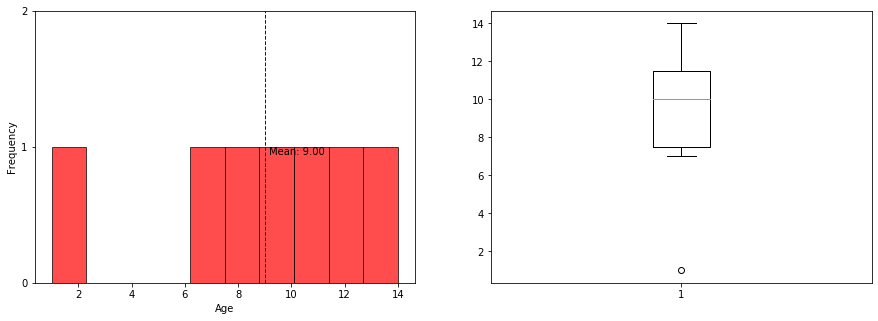

In [10]:
pltgraphs(data3)

We can see that the addition of the age of 1 as an extreme outlier will greatly mess with our data. It would probably be wise to use the Median here as the measure of central tendency as opposed to the mean. We should also definitely use standard deviation as opposed to Variance since it is normalized and Variance shot up like crazy with the addition of our extreme value.

### Question 5: Brady Bunch Fans

<i>5. On the 50th anniversary of The Brady Bunch, four different magazines asked their readers whether they were fans of the show.  The answers were:
 
        TV Guide            20% fans
        Entertainment Weekly    23% fans
        Pop Culture Today       17% fans
        SciPhi Phanatic     5% fans

Based on these numbers, what percentage of adult Americans would you estimate were Brady Bunch fans on the 50th anniversary of the show?

We can probably safely remove ScPhi Phanatic magazine from our calculation (it's an outlier...and besides, you are probably quite an interesting person to read SciPhi Phanatic...), so therefore let's use the mean of the other three values:

In [11]:
fan_percent_mean = np.mean([20, 23, 17])
print(fan_percent_mean, "%")

20.0 %


Therefore, we can say that the 20% of adult Americans are Brady Bunch fans on the 50th anniversary of the show.